In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Dense, Activation, GlobalAveragePooling2D, Input

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
import keras.backend as K

from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [0]:
ls

drive/  Graph/  sample_data/


In [0]:
data_path = '/content/drive/My Drive/petrography/numpy_array_folder/'

In [0]:
x_images = np.load(data_path + "/x_images_px6.npz")
x = x_images['arr_0']

y_label = np.load(data_path + "/y_label_px6.npz")
y = y_label['arr_0']

In [0]:
x[450]

array([[[105.,  98.,  88., ..., 145., 190., 195.],
        [199., 240., 241., ..., 160., 155., 146.],
        [139., 133., 140., ..., 144., 130., 129.],
        ...,
        [ 66.,  69.,  77., ..., 165., 175., 167.],
        [116., 115., 120., ..., 151.,  92.,  90.],
        [ 91.,  61.,  56., ...,  85.,  82.,  86.]],

       [[ 82.,  83., 128., ..., 144., 144., 146.],
        [137., 138., 143., ..., 164., 123., 121.],
        [122.,   9.,   5., ...,  57.,  53.,  94.],
        ...,
        [201., 178., 182., ..., 229., 233., 204.],
        [205., 207., 144., ..., 144., 135., 126.],
        [ 77.,  72.,  69., ..., 157., 199., 201.]],

       [[200., 165., 169., ..., 154., 159., 199.],
        [200., 204., 221., ..., 106.,  95.,  89.],
        [102.,  98.,  89., ..., 130., 147., 146.],
        ...,
        [101.,  92.,  93., ...,  28.,   0.,   0.],
        [  9.,  47.,  46., ..., 169., 161.,  66.],
        [ 64.,  52.,  33., ...,  92.,  86.,  96.]]], dtype=float32)

In [0]:
y

array(['pi', 'pi', 'pi', ..., 'xs', 'xs', 'xs'], dtype='<U2')

In [0]:
# Split into training, validation, and test sets (80/10/10)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)

print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))
# print("Train set size: {0}, Test set size: {1}".format(len(X_train), len(X_test)))

Train set size: 3840, Val set size: 480, Test set size: 480


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255.0
X_test /= 255.0
X_val /= 255.0

In [0]:
X_train_reshape = X_train.reshape(-1,224,224,3)
X_val_reshape = X_val.reshape(-1,224,224,3)
X_test_reshape = X_test.reshape(-1,224,224,3)

In [0]:
# integer encode
label_encoder = LabelEncoder()
y_train_integer_encoded = label_encoder.fit_transform(y_train)
y_val_integer_encoded = label_encoder.fit_transform(y_val)
y_test_integer_encoded = label_encoder.fit_transform(y_test)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)

y_train_integer_encoded = y_train_integer_encoded.reshape(len(y_train_integer_encoded), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train_integer_encoded)

y_val_integer_encoded = y_val_integer_encoded.reshape(len(y_val_integer_encoded), 1)
y_val_onehot = onehot_encoder.fit_transform(y_val_integer_encoded)

y_test_integer_encoded = y_test_integer_encoded.reshape(len(y_test_integer_encoded), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test_integer_encoded)

print("y: Train set shape: {0}, Val set shape: {1}, Test set shape: {2}".format(y_train_onehot.shape, y_val_onehot.shape, y_val_onehot.shape))

y: Train set shape: (3840, 6), Val set shape: (480, 6), Test set shape: (480, 6)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
y_train_onehot.shape

(3840, 6)

In [0]:
y_val_onehot.shape

(480, 6)

In [0]:
y_test_onehot.shape

(480, 6)

In [0]:
X_train.shape

(3840, 3, 224, 224)

In [0]:
X_val.shape

(480, 3, 224, 224)

In [0]:
X_test.shape

(480, 3, 224, 224)

In [0]:
X_train_reshape.shape

(3840, 224, 224, 3)

In [0]:
X_val_reshape.shape

(480, 224, 224, 3)

In [0]:
X_test_reshape.shape

(480, 224, 224, 3)

In [0]:
X_train[450]

array([[[0.06666667, 0.01176471, 0.00784314, ..., 0.9254902 ,
         0.85882354, 0.90588236],
        [0.90588236, 0.6784314 , 0.7137255 , ..., 0.23137255,
         0.25490198, 0.38431373],
        [0.41960785, 0.45490196, 0.14117648, ..., 0.0627451 ,
         0.05882353, 0.04313726],
        ...,
        [0.8       , 0.80784315, 0.5254902 , ..., 0.21568628,
         0.22745098, 0.24705882],
        [0.24313726, 0.30980393, 0.34901962, ..., 0.03921569,
         0.03529412, 0.02745098],
        [0.03921569, 0.03137255, 0.02352941, ..., 0.5568628 ,
         0.5568628 , 0.7647059 ]],

       [[0.8039216 , 0.8117647 , 0.5137255 , ..., 0.36078432,
         0.40392157, 0.4117647 ],
        [0.38431373, 0.4509804 , 0.5137255 , ..., 0.02745098,
         0.03137255, 0.02352941],
        [0.03529412, 0.02352941, 0.01568628, ..., 0.12156863,
         0.11764706, 0.43137255],
        ...,
        [0.18431373, 0.84313726, 0.827451  , ..., 0.6745098 ,
         0.654902  , 0.7647059 ],
        [0.7

In [0]:
X_train_reshape[450]

array([[[0.06666667, 0.01176471, 0.00784314],
        [0.12941177, 0.09019608, 0.12156863],
        [0.02352941, 0.01960784, 0.07450981],
        ...,
        [0.09803922, 0.08235294, 0.07843138],
        [0.0627451 , 0.04705882, 0.03529412],
        [0.0627451 , 0.05882353, 0.04313726]],

       [[0.34117648, 0.28627452, 0.2509804 ],
        [0.25882354, 0.21568628, 0.20784314],
        [0.05490196, 0.02745098, 0.05490196],
        ...,
        [0.05490196, 0.04705882, 0.05882353],
        [0.0627451 , 0.05490196, 0.05882353],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.47058824, 0.40784314, 0.34901962],
        [0.29803923, 0.24313726, 0.20784314],
        [0.12941177, 0.07450981, 0.07058824],
        ...,
        [0.05490196, 0.04705882, 0.05882353],
        [0.05098039, 0.05098039, 0.05882353],
        [0.04705882, 0.03921569, 0.04313726]],

       ...,

       [[0.14509805, 0.16862746, 0.15294118],
        [0.14509805, 0.18431373, 0.19215687],
        [0.2627451 , 0

In [0]:
y_train_onehot[450]

array([0., 0., 0., 1., 0., 0.])

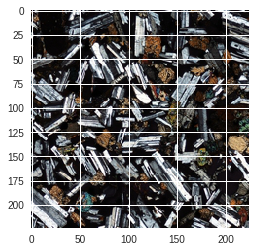

In [0]:
plt.imshow(X_train_reshape[450])
plt.show()

In [0]:
K.set_image_data_format('channels_last')
K.image_data_format()

'channels_last'

**ResNet 50**

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
# from resnets_utils import *

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

In [0]:
img_height,img_width = 224, 224 
num_classes = 6

base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer = adam,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
checkpointer = ModelCheckpoint(filepath = '/content/drive/My Drive/petrography/model/weights_resnet50.hdf5',
                               verbose=1, save_best_only=True)

In [0]:
from tensorboardcolab import *
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://7a58e0d5.ngrok.io


In [0]:
history = model.fit(x = X_train_reshape, y = y_train_onehot, batch_size=32,
                    epochs=100, 
                    validation_data=(X_val_reshape, y_val_onehot), shuffle=True,
                    callbacks=[checkpointer, TensorBoardColabCallback(tbc)])

Instructions for updating:
Use tf.cast instead.
Train on 3840 samples, validate on 480 samples
Epoch 1/100
3840/3840 [==============================] - 126s 33ms/step - loss: 0.4905 - acc: 0.8214 - val_loss: 0.0947 - val_acc: 0.9625

Epoch 00001: val_loss improved from inf to 0.09469, saving model to /content/drive/My Drive/petrography/model/weights_resnet50.hdf5
Epoch 2/100
3840/3840 [==============================] - 113s 30ms/step - loss: 0.0779 - acc: 0.9703 - val_loss: 0.0803 - val_acc: 0.9750

Epoch 00002: val_loss improved from 0.09469 to 0.08030, saving model to /content/drive/My Drive/petrography/model/weights_resnet50.hdf5
Epoch 3/100
3840/3840 [==============================] - 114s 30ms/step - loss: 0.0423 - acc: 0.9852 - val_loss: 0.1094 - val_acc: 0.9667

Epoch 00003: val_loss did not improve from 0.08030
Epoch 4/100
3840/3840 [==============================] - 113s 30ms/step - loss: 0.0485 - acc: 0.9852 - val_loss: 0.1321 - val_acc: 0.9542

Epoch 00004: val_loss did not 

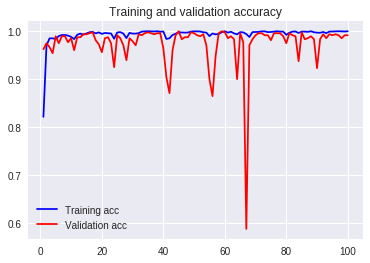

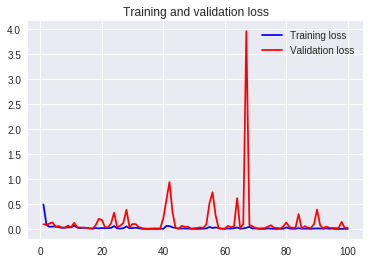

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
result = model.evaluate(X_test_reshape, y_test_onehot)
print ("Loss = " + str(result[0]))
print ("Test Accuracy = " + str(result[1]))

480/480 [==============================] - 4s 9ms/step
Loss = 0.0017481531287330653
Test Accuracy = 1.0


In [0]:
pred = model.predict(X_test_reshape, verbose=1)

480/480 [==============================] - 6s 12ms/step


In [0]:
result

[0.0017481531287330653, 1.0]

In [0]:
pred

array([[1.0000000e+00, 1.2856787e-09, 1.9954154e-09, 1.7376703e-08,
        9.9085779e-13, 2.7129241e-09],
       [4.6319607e-07, 4.3536445e-11, 1.9647375e-08, 9.9999917e-01,
        8.1567419e-09, 2.9095634e-07],
       [9.9999988e-01, 7.5445282e-11, 2.9856723e-10, 6.0978564e-08,
        2.0905361e-12, 1.8182528e-10],
       ...,
       [3.7891061e-06, 7.1573163e-07, 1.5043156e-01, 4.3676994e-04,
        5.1065472e-06, 8.4912211e-01],
       [9.3477986e-08, 1.7384467e-06, 9.9997461e-01, 1.0249062e-06,
        1.9042576e-05, 3.4769780e-06],
       [1.9764173e-04, 4.1291563e-04, 9.8997796e-01, 7.2635572e-05,
        8.4162668e-05, 9.2546782e-03]], dtype=float32)

In [0]:
y_train_pred = model.predict(X_train_reshape).ravel()
y_test_pred = model.predict(X_test_reshape).ravel()

In [0]:
y_train_pred_class = model.predict(X_train_reshape)
y_test_pred_class = model.predict(X_test_reshape)

In [0]:
y_train_pred

array([2.3715838e-10, 2.0529189e-11, 8.1414309e-10, ..., 1.0000000e+00,
       1.2442992e-19, 3.9933223e-17], dtype=float32)

In [0]:
y_train_pred_class

array([[2.3715838e-10, 2.0529189e-11, 8.1414309e-10, 6.9214838e-09,
        9.9999952e-01, 4.2375521e-07],
       [6.2531691e-10, 2.9842102e-09, 9.9999988e-01, 1.1953827e-08,
        2.8403593e-10, 1.0543065e-07],
       [9.9995840e-01, 6.8745026e-10, 6.9553721e-08, 4.1352381e-05,
        3.1571572e-11, 1.8168977e-07],
       ...,
       [1.2482275e-09, 8.0343831e-12, 2.8350265e-11, 9.9999988e-01,
        6.4227827e-08, 8.5956451e-09],
       [9.9999917e-01, 4.8544332e-11, 5.7696248e-10, 8.6837758e-07,
        1.2778603e-11, 9.6947152e-11],
       [2.7242016e-13, 2.5461095e-15, 5.5417015e-18, 1.0000000e+00,
        1.2442992e-19, 3.9933223e-17]], dtype=float32)

In [0]:
y_test_pred

array([1.0000000e+00, 1.2856787e-09, 1.9954154e-09, ..., 7.2635572e-05,
       8.4162668e-05, 9.2546782e-03], dtype=float32)

In [0]:
y_train_pred_class

array([[2.3715838e-10, 2.0529189e-11, 8.1414309e-10, 6.9214838e-09,
        9.9999952e-01, 4.2375521e-07],
       [6.2531691e-10, 2.9842102e-09, 9.9999988e-01, 1.1953827e-08,
        2.8403593e-10, 1.0543065e-07],
       [9.9995840e-01, 6.8745026e-10, 6.9553721e-08, 4.1352381e-05,
        3.1571572e-11, 1.8168977e-07],
       ...,
       [1.2482275e-09, 8.0343831e-12, 2.8350265e-11, 9.9999988e-01,
        6.4227827e-08, 8.5956451e-09],
       [9.9999917e-01, 4.8544332e-11, 5.7696248e-10, 8.6837758e-07,
        1.2778603e-11, 9.6947152e-11],
       [2.7242016e-13, 2.5461095e-15, 5.5417015e-18, 1.0000000e+00,
        1.2442992e-19, 3.9933223e-17]], dtype=float32)